<h1><span style="font-size:34px">Customer Churn Analysis Project</span></h1>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("C:/Users/ayush/Documents/PROJECTS/Customer_Churn_Analysis/Customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Replacing blanks with 0 as tenure is 0 and no total charges are recorded and convert data-type to float

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()     

np.int64(0)

In [11]:
df["customerID"].duplicated().sum()

np.int64(0)

In [12]:
def conv(value):             
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#converted 0 to 1 values of senior citizen to yes/no

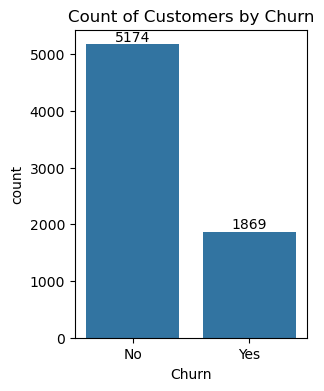

In [13]:
plt.figure(figsize = (3,4))

ax = sns.countplot(x = df['Churn'], data = df)
plt.title("Count of Customers by Churn")
ax.bar_label(ax.containers[0])
plt.show()

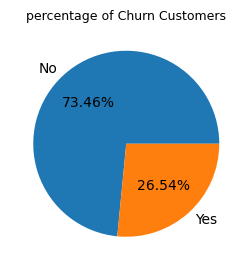

In [14]:
plt.figure(figsize = (3,4))

gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("percentage of Churn Customers", fontsize = 9)
plt.show()

-from the pie-chart we can conclude that 26.54% of our customers have have left.
-Now lets explore the reason behind it 

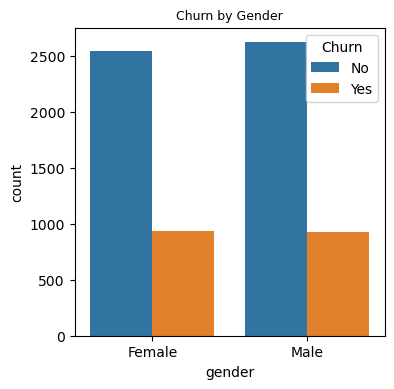

In [23]:
plt.figure(figsize = (4,4))

sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender", fontsize = 9)
plt.show()

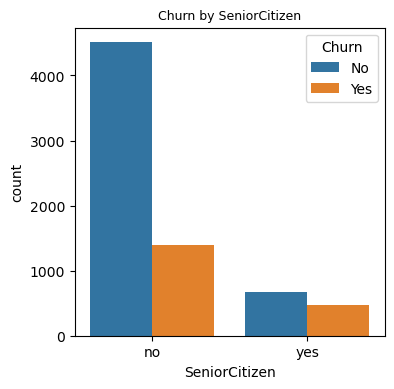

In [15]:
plt.figure(figsize = (4,4))

sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen", fontsize = 9)
plt.show()

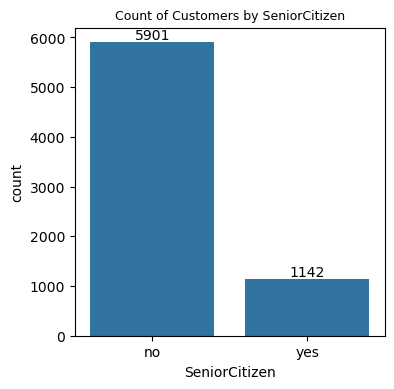

In [16]:
plt.figure(figsize=(4, 4))

ax = sns.countplot(x="SeniorCitizen", data=df)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of Customers by SeniorCitizen", fontsize=9)
plt.show()

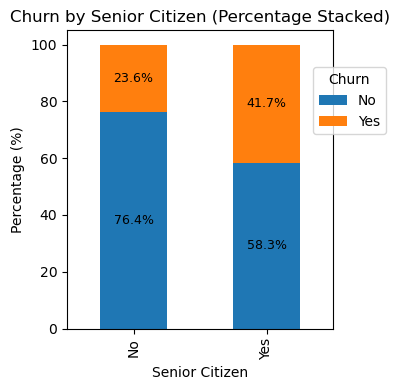

In [17]:
# Step 1: Create a crosstab to count Churn per SeniorCitizen
crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert counts to percentages (row-wise)
percentages = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind='bar', stacked=True, figsize=(4, 4), color=['#1f77b4', '#ff7f0e'])

for i, row in enumerate(percentages.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cum_sum + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
            cum_sum += val

plt.title('Churn by Senior Citizen (Percentage Stacked)', fontsize=12)
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Optional: rename 0 and 1
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))
plt.tight_layout()
plt.show()


#comparatively a Greater % of people in senior citizen category have churned

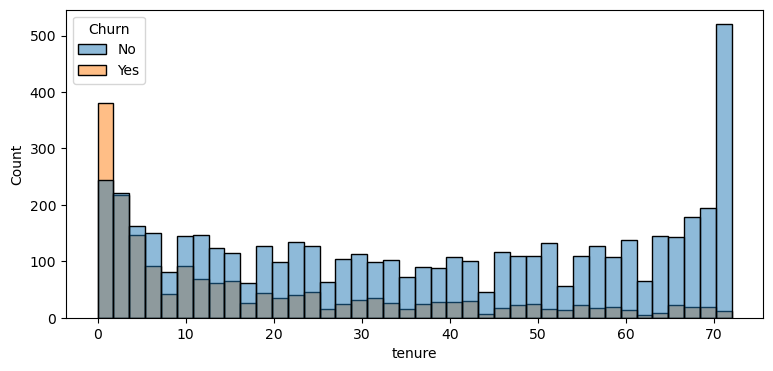

In [18]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure" , data = df, bins = 40, hue = "Churn")
plt.show()

- People who have used our services for a long time have stayed However people who have used our services for 1 or 2 months have Left

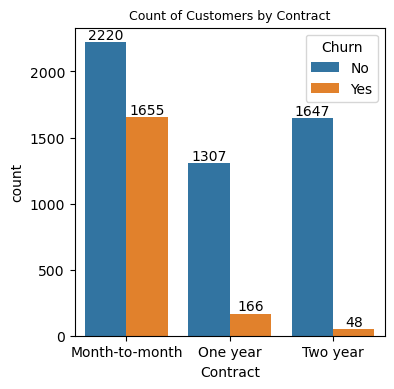

In [19]:
plt.figure(figsize=(4, 4))

ax = sns.countplot(x="Contract", data=df, hue = "Churn")

for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of Customers by Contract", fontsize=9)
plt.show()

from the chart we can conclude that people who are on Monthly contract are likely to leave then too the people who are staying for over 1 years.

In [20]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

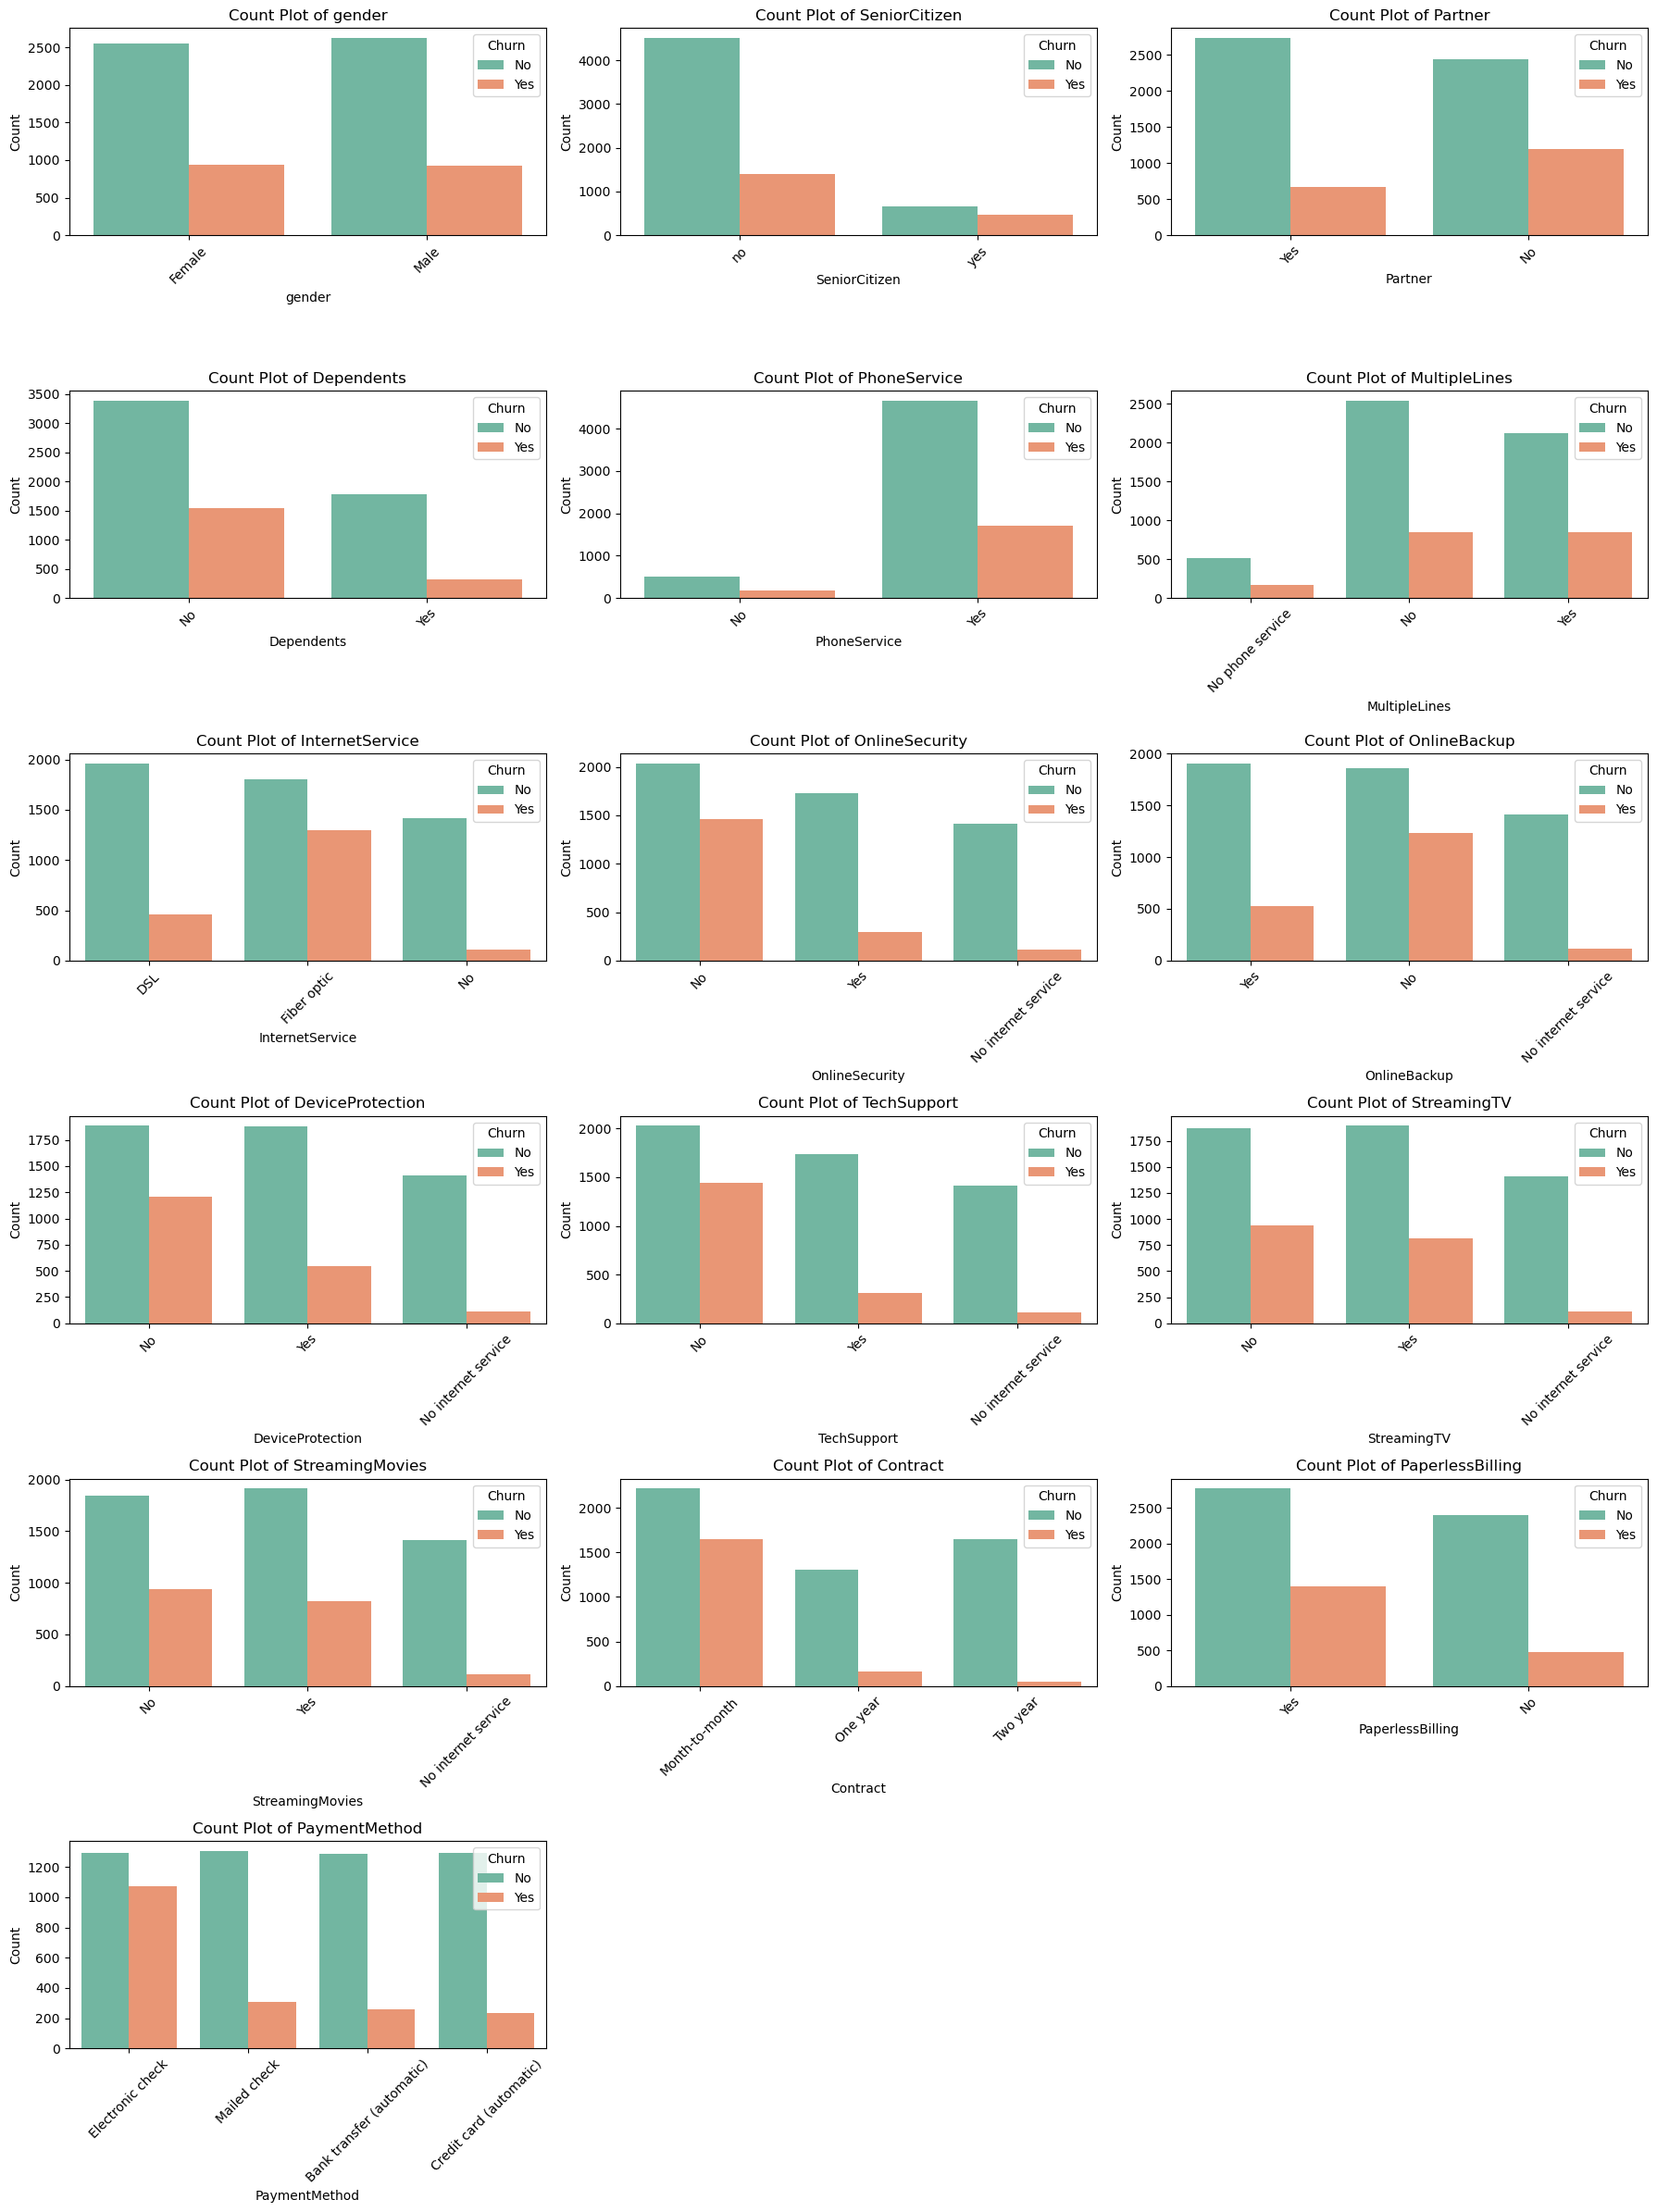

In [21]:
# Define columns (excluding customerID and numeric ones if needed)
columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Number of subplot columns
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()  # Flatten axes for easy indexing

# Create countplots with Churn as hue
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, hue=df["Churn"], ax=axes[i], palette="Set2")
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Layout fix
plt.tight_layout()
plt.show()


This set of count plots visualizes the distribution of customer churn ("Yes" or "No") across various categorical features in a telecom dataset. Key insights include higher churn rates among customers with no dependents, month-to-month contracts, and those lacking tech support, online security, or backup services. Additionally, churn is more prevalent among customers with paperless billing and electronic check payments.

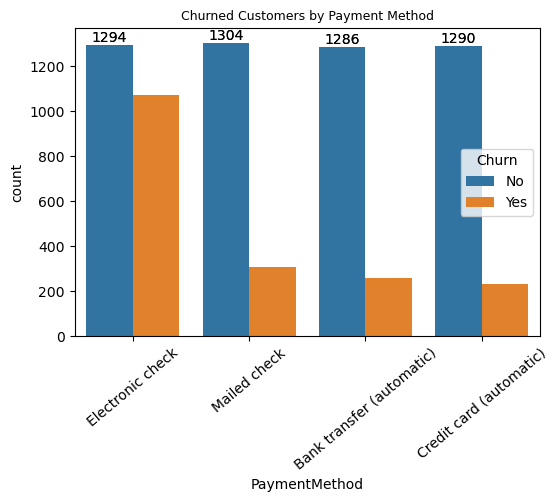

In [22]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x="PaymentMethod", data=df, hue = "Churn")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by Payment Method", fontsize=9)
plt.xticks(rotation = 40)
plt.show()

customer is likely to Leave when he is using electronic Check as a payment method